# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

C:\Users\Siegfried Vieluf\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
[nltk_data] Downloading package vader_lexicon to C:\Users\Siegfried
[nltk_data]     Vieluf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("keys.env")
api_key=os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
BTC_headlines=newsapi.get_everything(q="Bitcoin",language="en",sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
ETH_headlines=newsapi.get_everything(q="Ethereum",language="en",sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments=[]

for article in BTC_headlines["articles"]:
    try:
        text=article["content"]
        date=article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos=sentiment["pos"]
        neu = sentiment["neu"]
        neg=sentiment['neg']
    
        btc_sentiments.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
    
    except AttributeError :
        pass
    
BTC_df=pd.DataFrame(btc_sentiments)
columns=['date','text','compound','positive','negative','neutral']
BTC_df=BTC_df[columns]

BTC_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,2021-03-03,,0.0000,0.000,0.000,0.000
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments=[]

for article in ETH_headlines["articles"]:
    try:
        text=article["content"]
        date=article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos=sentiment["pos"]
        neu = sentiment["neu"]
        neg=sentiment['neg']
    
        eth_sentiments.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
    
    except AttributeError :
        pass
    
ETH_df=pd.DataFrame(eth_sentiments)
columns=['date','text','compound','positive','negative','neutral']
ETH_df=ETH_df[columns]

ETH_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
3,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789


In [8]:
# Describe the Bitcoin Sentiment
BTC_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.038342,0.056842,0.043895,0.846684
std,0.464811,0.077159,0.087203,0.233882
min,-0.906200,0.000000,0.000000,0.000000
25%,-0.125000,0.000000,0.000000,0.810500
50%,0.000000,0.000000,0.000000,0.890000
75%,0.271550,0.087000,0.047500,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ETH_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.164405,0.070250,0.030750,0.899050
std,0.407550,0.071886,0.046713,0.076916
min,-0.557400,0.000000,0.000000,0.754000
25%,-0.038275,0.000000,0.000000,0.856000
50%,0.160900,0.072000,0.000000,0.916500
75%,0.449150,0.090250,0.064500,0.938250
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium had a higher mean positive score.

Q: Which coin had the highest compound score?

A: They both had the same max compound score. 

Q. Which coin had the highest positive score?

A: They both had the same max positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download("stopwords")

# Expand the default stopwords list if necessary
sw_addons = {"reuters", "ha", "stafffile", "photo", "poster",  "one", "according","january","u","year","char","new","taken","week","seen",'million',"company","everything"}

[nltk_data] Downloading package stopwords to C:\Users\Siegfried
[nltk_data]     Vieluf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw=set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word)for word in words]
   
    # Convert the words to lowercase
    tokens=[word.lower()for word in lem if word.lower() not in sw.union(sw_addons)]    
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
BTC_df["tokens"] = BTC_df['text'].apply(tokenizer)
BTC_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[strictest, crackdown, worldwidephoto, michele..."
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, big, twitter, hack, sen..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,[]
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."


In [14]:
# Create a new tokens column for Ethereum
ETH_df["tokens"] = ETH_df['text'].apply(tokenizer)
ETH_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[strictest, crackdown, worldwidephoto, michele..."
2,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, need, know, nonfungible, token, latest..."
3,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, handful, nft, marketplace, explode, ..."
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def bigram_counter(text): 
    processed = tokenizer(text)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
BTC_tokens = str(list(BTC_df["tokens"]))
bigram_counter(BTC_tokens)

,bigram,count
0,"(virtual, currency)",5
1,"(picture, illustration)",3
2,"(representation, virtual)",3
3,"(currency, bitcoin)",3
4,"(illustration, reutersdado)",3
5,"(cryptocurrency, exchange)",2
6,"(investment, giveaway)",2
7,"(collection, bitcoin)",2
8,"(bitcoin, virtual)",2
9,"(currency, token)",2


In [18]:
# Generate the Ethereum N-grams where N=2
ETH_tokens = str(list(ETH_df["tokens"]))
bigram_counter(ETH_tokens)

,bigram,count
0,"(nonfungible, token)",3
1,"(latest, cryptocurrency)",2
2,"(blockchain, startup)",2
3,"(king, leon)",2
4,"(cryptocurrency, platform)",2
5,"(cryptocurrency, exchange)",2
6,"(investment, giveaway)",2
7,"(famed, auction)",1
8,"(auction, house)",1
9,"(house, christie)",1


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
BTC_count = tokenizer(BTC_tokens)
print(dict(token_count(BTC_count, 10)))

{'bitcoin': 10, 'virtual': 5, 'currency': 5, 'illustration': 5, 'cryptocurrency': 4, 'exchange': 4, 'public': 3, 'picture': 3, 'representation': 3, 'reutersdado': 3}


In [21]:
# Use token_count to get the top 10 words for Ethereum
ETH_count = tokenizer(ETH_tokens)
print(dict(token_count(ETH_count, 10)))

{'cryptocurrency': 8, 'digital': 5, 'nfts': 5, 'ethereum': 5, 'bitcoin': 5, 'token': 4, 'investment': 4, 'sold': 3, 'cryptocurrencies': 3, 'nonfungible': 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

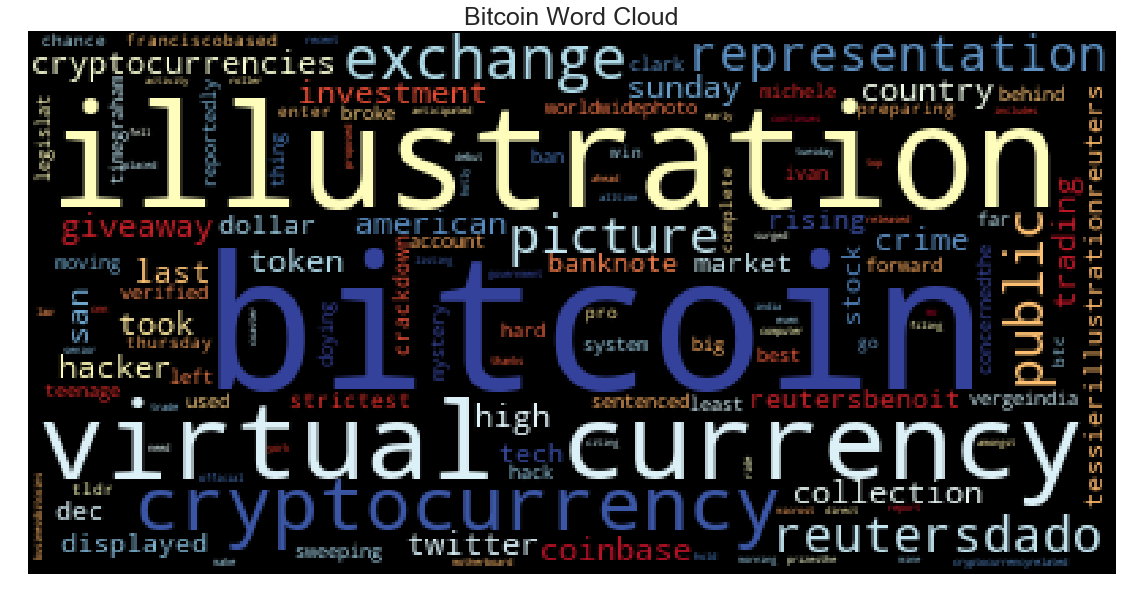

In [23]:
# Generate the Bitcoin word cloud
BTC_wc_tokens = ' '.join(BTC_count)
BTC_wc = WordCloud(colormap="RdYlBu").generate(BTC_wc_tokens)
plt.imshow(BTC_wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize = 25)
plt.show()

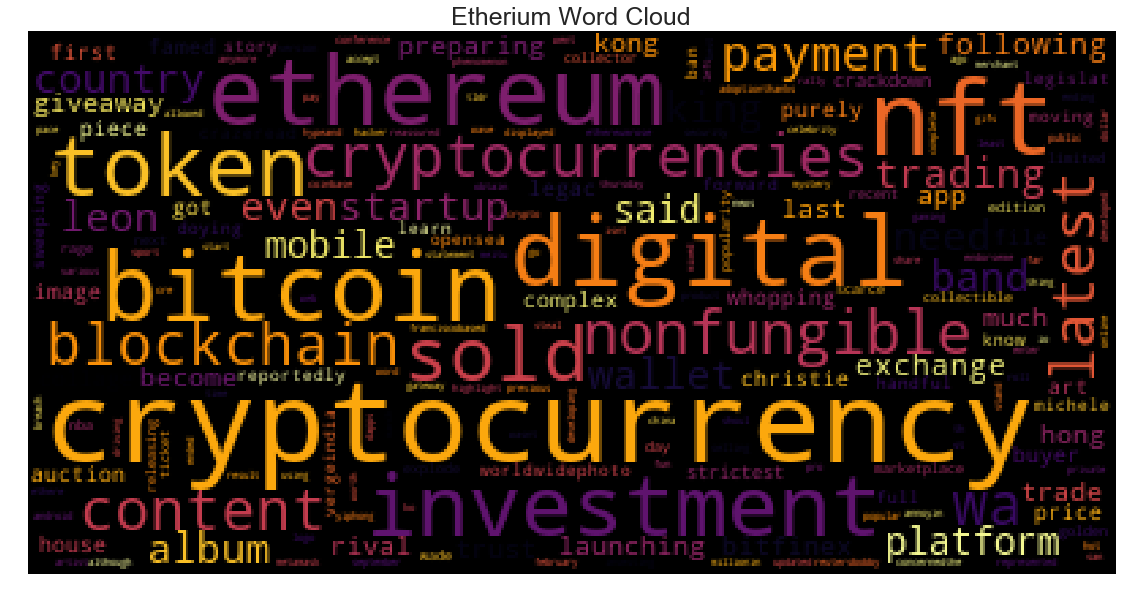

In [24]:
# Generate the Ethereum word cloud
ETH_wc_tokens = ' '.join(ETH_count)
ETH_wc = WordCloud(colormap="inferno").generate(ETH_wc_tokens)
plt.imshow(ETH_wc)
plt.axis("off")
plt.title("Etherium Word Cloud", fontsize = 25)
plt.figsize=(20,10)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
BTC_corpus="" 
for i in range(0,len(BTC_df)):
    BTC_corpus +=str(BTC_df.text[i])

In [29]:
# Run the NER processor on all of the text
BTC_ner = nlp(BTC_corpus)

# Add a title
BTC_ner.user_data["title"]="BTC NER"

In [30]:
# Render the visualization
displacy.render(BTC_ner,style="ent")

In [31]:
# List all Entities
btc_ent=([ent.text for ent in BTC_ner ])
btc_ent

['One',
 'of',
 'the',
 'strictest',
 'crackdowns',
 'worldwide',
 '\r\n',
 'Photo',
 'by',
 'Michele',
 'Doying',
 '/',
 'The',
 'Verge',
 '\r\n',
 'India',
 'is',
 'reportedly',
 'moving',
 'forward',
 'with',
 'a',
 'sweeping',
 'ban',
 'on',
 'cryptocurrencies',
 '.',
 'According',
 'to',
 'Reuters',
 ',',
 'the',
 'countrys',
 'legislat',
 '…',
 '[',
 '+1656',
 'chars]The',
 'hacker',
 'behind',
 'last',
 'years',
 'big',
 'Twitter',
 'hack',
 '\r\n ',
 'has',
 'just',
 'been',
 'sentenced',
 'to',
 'hard',
 'time',
 '.',
 '\r\n',
 'Graham',
 'Ivan',
 'Clark',
 ',',
 'the',
 'teenage',
 'hacker',
 'who',
 'broke',
 '\r\n ',
 'into',
 'Twitters',
 'systems',
 ',',
 'took',
 'over',
 'verified',
 'accounts',
 ',',
 'and',
 'used',
 't',
 '…',
 '[',
 '+2552',
 'chars]Some',
 'things',
 'are',
 'best',
 'left',
 'a',
 'mystery',
 'at',
 'least',
 'as',
 'far',
 'as',
 'Coinbase',
 'is',
 'concerned',
 '.',
 '\xa0\r\n',
 'The',
 'San',
 'Francisco',
 '-',
 'based',
 'cryptocurrency',
 

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
ETH_corpus="" 
for i in range(0,len(ETH_df)):
    ETH_corpus +=str(ETH_df.text[i])

In [33]:
# Run the NER processor on all of the text
ETH_ner = nlp(ETH_corpus)

# Add a title
ETH_ner.user_data["title"]="ETH NER"

In [34]:
# Render the visualization
displacy.render(ETH_ner,style="ent")

In [35]:
# List all Entities
eth_ent=([ent.text for ent in ETH_ner ])
eth_ent

['Famed',
 'auction',
 'house',
 'Christies',
 'just',
 'sold',
 'its',
 'first',
 'purely',
 'digital',
 'piece',
 'of',
 'art',
 'for',
 'a',
 'whopping',
 '$',
 '69',
 'million',
 '.',
 'For',
 'that',
 'price',
 ',',
 'the',
 'buyer',
 'got',
 'a',
 'digital',
 'file',
 'of',
 'a',
 'collage',
 'of',
 '5,000',
 'images',
 'and',
 'a',
 'complex',
 'legac',
 '…',
 '[',
 '+12891',
 'chars]One',
 'of',
 'the',
 'strictest',
 'crackdowns',
 'worldwide',
 '\r\n',
 'Photo',
 'by',
 'Michele',
 'Doying',
 '/',
 'The',
 'Verge',
 '\r\n',
 'India',
 'is',
 'reportedly',
 'moving',
 'forward',
 'with',
 'a',
 'sweeping',
 'ban',
 'on',
 'cryptocurrencies',
 '.',
 'According',
 'to',
 'Reuters',
 ',',
 'the',
 'countrys',
 'legislat',
 '…',
 '[',
 '+1656',
 'chars]Here',
 "'s",
 'everything',
 'you',
 'need',
 'to',
 'know',
 'about',
 'non',
 '-',
 'fungible',
 'tokens',
 ',',
 'the',
 'latest',
 'cryptocurrency',
 'craze',
 '.',
 '\r\n',
 'Read',
 'the',
 'full',
 'story',
 'here',
 '.',
 '

---